# MPG (Miles per galon) verisi ile Linear Regression

In [ ]:
#pip install pandas

In [1]:
import pandas as pd

In [4]:
df_mpg=pd.read_csv("data/mpgcars.csv")
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### Alanları keşfedelim ve Horsepower alanında !? işareti var. onu eleyelim

In [88]:
#df_mpg.columns
#df_mpg.shape
df_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
modelyear         int64
origin            int64
carname          object
dtype: object

In [15]:
df_mpg.isnull().any() #herhangi bir null var mı?

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
modelyear       False
origin          False
carname         False
dtype: bool

In [184]:
#import numpy as np
#df_mpg.applymap(np.isreal).all() ##sayısal olmayan alan var mı? horsepowerda var. #isreal text ise zaten sayısal değil diyor.

In [185]:
sayi_olmayanlar={x for x in df_mpg["horsepower"] if not(x.isnumeric())} #numeric olmayan farklı değerler. set benzersiz getirir.
sayi_olmayanlar

{'?'}

In [173]:
df_mpg[df_mpg["horsepower"]=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [178]:
sayi_olan_filtresi=[s.isnumeric() for s in df_mpg["horsepower"]]
#df_mpg[df_mpg["horsepower"]!="?"]

In [187]:
df=df_mpg[sayi_olan_filtresi]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [188]:
#alanın veri tipini değiştrelim
df=df.astype({"horsepower":int})

In [191]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
modelyear         int64
origin            int64
carname          object
dtype: object

### Görselleştirelim

In [194]:
import matplotlib.pyplot as plt

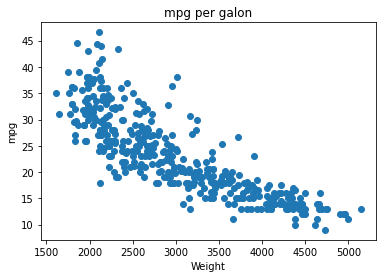

In [197]:
plt.scatter(x=df.weight,y=df.mpg)

plt.title("mpg per galon")
plt.xlabel("Weight")
plt.ylabel("mpg")

plt.show()

### numpy polyfit kullanarak doğru denklemei elde edelim

In [202]:
### lienar bir doğru ile ifade edebiliriz.
import numpy as np
m,b=np.polyfit(df.weight,df.mpg,1) #bize eğim ve y ekseni kesen noktayı veriyor.

In [204]:
#doğru denklemini versin
def f(x):
    return m*x+b

In [205]:
print(' y = {0} * x + {1}'.format(m, b))

 y = -0.0076473425357795844 * x + 46.21652454901759


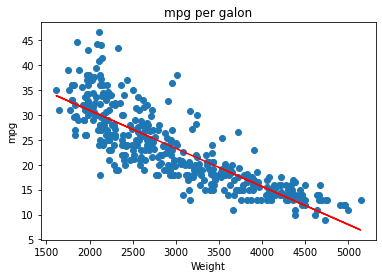

In [212]:
#doğru denklemi ile görselleştirelim. doğrusal bir illişki var.
plt.scatter(x=df.weight,y=df.mpg)

plt.plot(df.weight,f(df.weight),color="red")

plt.title("mpg per galon")
plt.xlabel("Weight")
plt.ylabel("mpg")

plt.show()

In [215]:
np.corrcoef(df.weight,df.mpg) #ters yönde yüksek bir koralasyon var.

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

### sklearn kullanarak linear regression yapalım

In [217]:
#tahminde kullanılacak ve tahmin edilecek kolonları seçelim
features=["cylinders","displacement","horsepower","weight","acceleration","modelyear","origin"]
target=["mpg"]

X=df[features]
y=df[target]

In [220]:
#önce datayı train ve test diye ayıralım. Random ile de ayırabilirdik.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
print("Train: ",X_train.shape," Test: ",X_test.shape)

Train:  (274, 7)  Test:  (118, 7)


In [221]:
#Linear Regression için gerekli kütüphane
from sklearn.linear_model import LinearRegression

In [223]:
#modeli eğitelim
modelLR=LinearRegression().fit(X_train,y_train)

print(' y = {0} * x + {1}'.format(modelLR.coef_, modelLR.intercept_))

 y = [[-0.09120079  0.00519202  0.02281035 -0.00688944  0.26882417  0.81723453
   1.08042875]] * x + [-26.81380721]


In [257]:
#tahmin edelim
tahminler_LR=modelLR.predict(X_test)
#print(tahminler_LR)
print(tahminler_LR.shape)

(118, 1)


In [261]:
#list(zip(y_test["mpg"].values, tahminler_LR[:,0]))
pd.DataFrame(zip(y_test["mpg"].values, tahminler_LR[:,0]),columns=["Gerçek","Tahmin"]) #zip ile aynı sırada yanyana yazarız.

,Gerçek,Tahmin
0,17.0,17.459674
1,39.4,32.584006
2,16.0,14.008181
3,24.0,26.258226
4,28.0,30.255462
...,...,...
113,27.0,28.452189
114,19.8,25.551405
115,23.0,24.511116
116,29.0,28.757538


### Modeli serileştirmek ve daha sonra okumak için

In [268]:
#modeli serileştirmek için
import pickle

modelbin=pickle.dumps(modelLR)

In [303]:
import pickle

modelLR = pickle.loads(modelbin)
#print(modelLR)



modelLR.predict(df[0:1][features])

array([[14.3880235]])